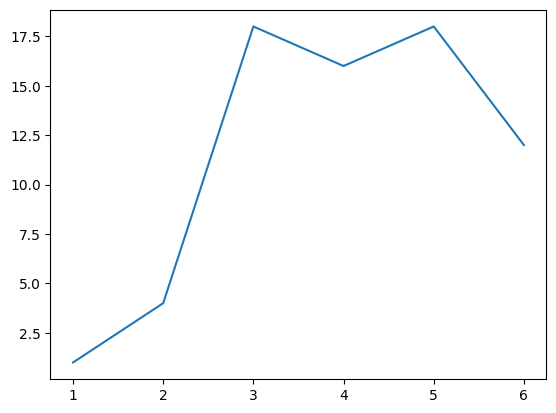

In [4]:
import matplotlib.pyplot as plt

x_values = [1, 2, 3, 4,5,6]
y_values = [1, 4, 18, 16,18,12]

plt.plot(x_values, y_values)
plt.show()

In [5]:
from distutils.log import info
import datetime
import pandas as pd
import numpy as np
from SQL import SQL_TabellenLadenBearbeiten as SQL
from DB_Daten_SAP import DatenAgregieren as DA




ModuleNotFoundError: No module named 'Data_Class'

In [ ]:
class SAPWM:
    heute = datetime.datetime.now()

dfOrders  = DA.orderDatenLines(SAPWM.heute,SAPWM.morgen)

#----- Lade Stellplatzdaten -----
dfBIN = SAPWM.datenLadenBIN()
dfBIN['MATNR'] = dfBIN['MATNR'].astype(str)
dfBIN['MATNR'] = dfBIN['MATNR'].str[:8]

#-- Bedarf letzte 7 Tage ermitteln
heuteMinus7Tage = SAPWM.heute - datetime.timedelta(days=7)
dfBedarfSKU = SAPWM.FilterNachDatum(heuteMinus7Tage,SAPWM.heute,dfOrders)
dfBedarfSKU = dfBedarfSKU.groupby(['MaterialNumber']).sum().reset_index()
dfBedarfSKU['GesamtBedarfSKU'] = dfBedarfSKU['Picks CS']
dfBedarfSKU = dfBedarfSKU[['MaterialNumber','GesamtBedarfSKU']]
#--- Stellplatzdaten mit Bedarf zusammenführen-----
dfOrders = dfOrders.merge(dfBedarfSKU, how='left', left_on='MaterialNumber', right_on='MaterialNumber')
dfOrders = dfOrders.merge(dfBIN, how='left', left_on='MaterialNumber', right_on='MATNR')
dfOrders = dfOrders.fillna(0)
dfOrders['GesamtBedarfSKU'] = dfOrders['GesamtBedarfSKU'].astype(int)
#------drop unnötige Spalten -----
dfOrders = dfOrders[['MaterialNumber','SapOrderNumber','GesamtBedarfSKU','PlannedDate' ,'Picks CS','LGPLA', 'LPMIN' ,'LPMAX' ,'LGTYP', 'LGNUM']]
dfOrders['LGPLA'] = dfOrders['LGPLA'].astype(str)
dfOrders = dfOrders.rename(columns={'Picks CS': 'BedarfCsTag'})
dfOrders = dfOrders.groupby(['MaterialNumber','SapOrderNumber','GesamtBedarfSKU','PlannedDate' ,'LGPLA', 'LPMIN' ,'LPMAX' ,'LGTYP', 'LGNUM'])['BedarfCsTag'].sum().reset_index()
dfOrders = dfOrders[['MaterialNumber','SapOrderNumber','GesamtBedarfSKU','BedarfCsTag','PlannedDate' ,'LGPLA', 'LPMIN' ,'LPMAX' ,'LGTYP', 'LGNUM']]
dfOrders = dfOrders[dfOrders.LGTYP != 'TN1']




NameError: name 'datetime' is not defined

'Tabelle wurde erfolgreich gelöscht'